### Compte rendu réalisé par: Meriam Cherif,Rouini Mouna,Soltane Med Skander

In [1]:

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt



In [2]:
path = "flower.png"
image = cv.imread(path)
img = cv.cvtColor(image, cv.COLOR_RGB2GRAY)


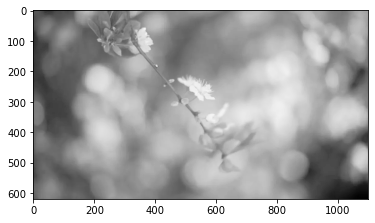

In [3]:
#3
plt.imshow(img,cmap="Greys_r")
plt.show()


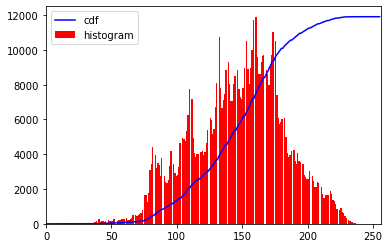

In [4]:
#4
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [5]:
#5  Cdf n'est pas bien étalé => il n' y a pas une bonne exploitation de la dynamique réelle de l'image. Les valeurs sont entre 
# 80 et 30

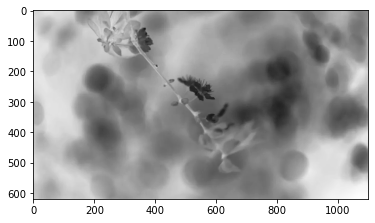

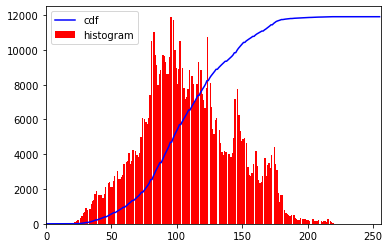

In [7]:
#6-
inverted= 255-img
plt.imshow(inverted,cmap="Greys_r")
plt.show()
hist,bins = np.histogram(inverted.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(inverted.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [8]:
#7- etirement d histogramme /etalement 
equ = cv.equalizeHist(img)


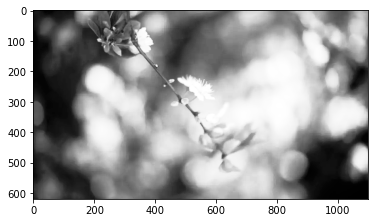

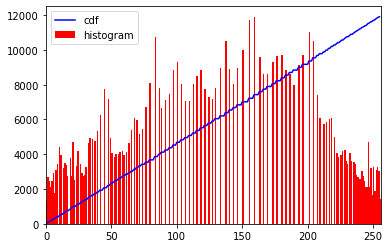

In [10]:
#8
plt.imshow(equ,cmap="Greys_r")
plt.show()
# Creation de l'historgrame et l'histograme cumulé 
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
# Normalisation de l'histograme cumulé avec le max ( N*M  ou bien cdf.max pour ne pas prendre de risque )
cdf_normalized = cdf * float(hist.max()) / cdf.max()
# Affichage de l'histograme et de l'histograme cumulé
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [11]:
 
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

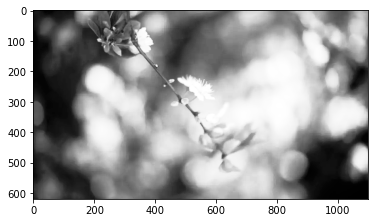

In [12]:
img2 = cdf[img]
plt.imshow(equ, cmap="Greys_r")
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_17012\3991581399.py:20: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  img_local = rank.equalize(img, selem=kernel)


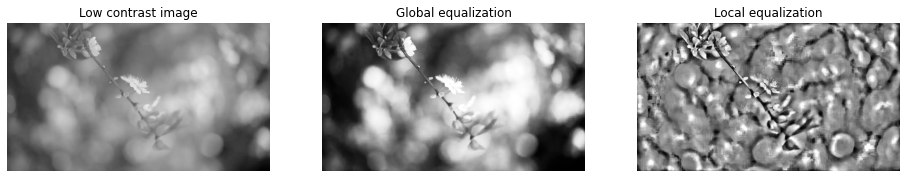

In [14]:
#9 comme si je decoupe mon image en imagette et sur chaque imagette on égalise l histogramme
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
from skimage.io import imsave, imread
# Original image
#img = img_as_ubyte(data.moon())
path = 'flower.png'
img = img_as_ubyte(imread(path, as_gray=True))
# Global equalize
img_global = exposure.equalize_hist(img)
# Local Equalization, disk shape kernel
# Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, selem=kernel)
plt.rcParams['figure.figsize'] = [16, 16]
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)
ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()
ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()
ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()
plt.show()
# elle fait trop d egalisation jusqu'à ce que le contraste devienne nefaste, tellement d effort et stretching jusquà perdre l objet!

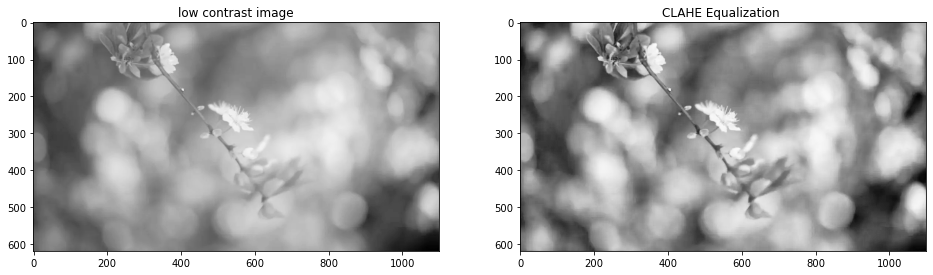

In [17]:
#Contrastive Limited Adaptive Equalization
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('tsukuba_l.png',0)
path = "flower.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayimg)
#cv.imwrite('clahe_2.jpg',cl1)
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap="Greys_r")
plt.title('low contrast image')
plt.subplot(1,2,2)


plt.imshow(cl1,cmap="Greys_r")
plt.title('CLAHE Equalization ')
plt.show()

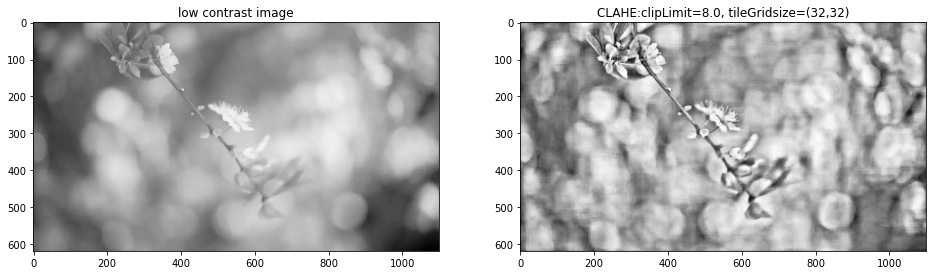

In [19]:
#11
#Try tuning createCLAHE parameters and comment the results
clahe = cv.createCLAHE(clipLimit=8.0, tileGridSize=(32,32))
cl1 = clahe.apply(grayimg)
# cv. imirite(“clahe_2. jpg’ 511)
plt.subplot(1,2,1)
plt.imshow(grayimg,cmap="Greys_r")
plt.title("low contrast image")
plt.subplot(1,2,2)

 

plt.imshow(cl1, cmap="Greys_r")
plt.title("CLAHE:clipLimit=8.0, tileGridsize=(32,32)")
plt.show()


In [20]:
#Le paramètre clipLimit détermine la quantité maximale de contraste qui peut être ajoutée à une image.
#En augmentant cette valeur jusqua 8 l'image devient plus contrasté.

#Le paramètre tileGridSize contrôle la taille des sous-régions de l'image qui sont traitées indépendamment les unes des autres.
#danc notre cas le taille des sous regions est (36,36) ce qui permet de traiter des régions plus larges de l'image.